# **GRIP: The Sparks Foundation**
### **Data Science and Business Analytics**
### **Author: Aman Kumar**

#### Task 1 : Prediction using Supervised ML

Predict the percentage of an student based on the number of study hours (9.25 hr)


### **Importing the Dataset**


Importing required libraries for the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here we are importing the dataset from the URL

In [3]:
url = "http://bit.ly/w-data"
student_Data = pd.read_csv(url)
print("Data imported successfully")

# Observing first 10 data
student_Data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Finding information about our dataset


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     5 non-null      int64  
 1   Predicted  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


Finding any null or missing value


In [15]:
df.isnull().sum()

Actual       0
Predicted    0
dtype: int64

### **Visualization The Dataset**


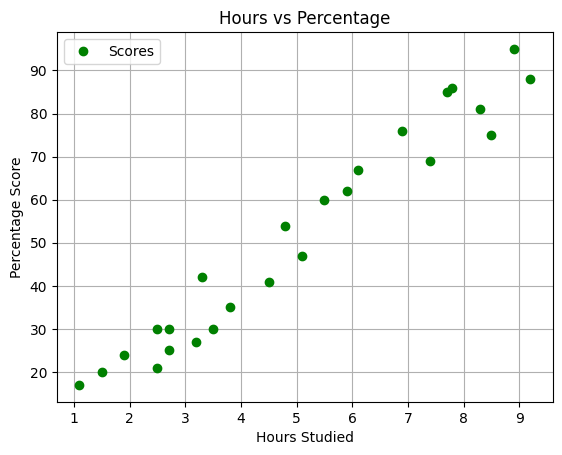

In [16]:
# Plotting Dataset
student_Data.plot(x='Hours', y='Scores', style='o',color="green")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


The above graph shows that there is a positive correlation between the "Hours Studied" and "Percentage Score". So we will be using this supervised model to predict the score

### **Data Preparation**
Here we will be dividing the data into "attributes"(Inputs) and "labels"(Outputs) by using iloc function. 

In [17]:
x = student_Data.iloc[:, :-1].values  
y = student_Data.iloc[:, 1].values

Now by using Scikit-Learn's built-in train_test_split() method we will be spliting data into Training and Testing data.

In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 


### **Training the Algoritm**
We have split our data into training and testing sets, and now is we will be training our algorithm. 

In [32]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)
print("Training complete")

Training complete


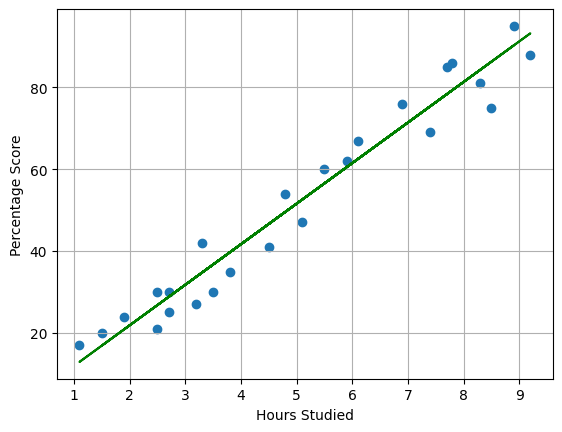

In [33]:
# Plotting the line
line = model.coef_*x+model.intercept_

# Plotting for testing data
plt.scatter(x, y)
plt.plot(x, line, color="green")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [34]:
print(X_test) 
y_pred = model.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
# Comparing Actual vs Predicted Data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [36]:
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])


The predicted score if a person studies for 9.25 hours is 93.69173248737535


### **Evaluating the Model**
In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### **Conclusion**
From the above result, we can conclude that if a person studies for a 9.25 hours, the predicted score would be approximately 93.7